<a href="https://colab.research.google.com/github/AdrianduPlessis/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/New_LS_DS6_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 132
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [1]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [2]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=19.477231325801114, pvalue=5.896210179534957e-05)


In [3]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

In [0]:
from scipy.stats import ttest_ind

?ttest_ind

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.4, 0.43333333333333335, 0.5666666666666667, 0.26666666666666666, 0.5333333333333333, 0.6, 0.6, 0.43333333333333335, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.4, 0.4, 0.5, 0.43333333333333335, 0.43333333333333335, 0.4, 0.4666666666666667, 0.36666666666666664, 0.5, 0.5666666666666667, 0.6, 0.4666666666666667, 0.5666666666666667, 0.6, 0.6, 0.6, 0.4666666666666667, 0.5666666666666667, 0.6, 0.43333333333333335, 0.5666666666666667, 0.4666666666666667, 0.3333333333333333, 0.5333333333333333, 0.6, 0.6, 0.43333333333333335, 0.4666666666666667, 0.4666666666666667, 0.4, 0.5666666666666667, 0.4, 0.5666666666666667, 0.6, 0.5, 0.43333333333333335, 0.43333333333333335, 0.3, 0.43333333333333335, 0.5333333333333333, 0.6, 0.4, 0.43333333333333335, 0.36666666666666664, 0.5333333333333333, 0.3, 0.5, 0.5, 0.5666666666666667, 0.43333333333333335, 0.5333333333333333, 0.5, 0.5333333333333333, 0.5, 0.4, 0.6333333333333333, 0.5333333333333333, 0.5, 0.5333333333333333, 0.4333333333333

In [0]:
# Create dataframe with single coin flip

In [0]:
# Plot histogram to look at distribution of a single coin flip 

In [0]:
# Plot histogram to look at distribution of all coin flips

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

## Standard Error of the Mean

What does it mean to "estimate"? the Population mean?

In [9]:
import numpy as np
import pandas as pd

# Average Height
mu = 70
sigma = 3

lambda_heights = np.random.normal(mu, sigma, 2000)
print(len(lambda_heights))
lambda_heights

2000


array([72.43816368, 67.92784527, 65.53818683, ..., 68.07267143,
       64.36503466, 66.14259806])

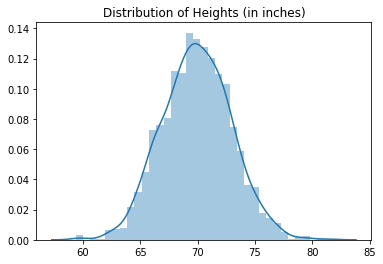

In [10]:
import seaborn as sns

sns.distplot(lambda_heights)
plt.title('Distribution of Heights (in inches)');

In [11]:
print("Population Mean:", lambda_heights.mean())
print("Population Standard Deviation:", lambda_heights.std())

Population Mean: 69.92275139914773
Population Standard Deviation: 2.9955550130444766


In [12]:
population = pd.DataFrame({'heights': lambda_heights})
print(population.shape)
population.head()

(2000, 1)


,heights
0,72.438164
1,67.927845
2,65.538187
3,73.951778
4,70.689990


In [0]:
# Take a random sample and print sample mean

In [0]:
# Take a different random sample and print sample mean

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

### What confidence level do we want our confidence interval to represent?

95% confidence Interval? 99% confidence interval? 

## Graphically Represent a Confidence Interval

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [16]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.5333333333333333, 0.5333333333333333, 0.6, 0.4666666666666667, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667, 0.4666666666666667, 0.43333333333333335, 0.4, 0.5666666666666667, 0.5, 0.4, 0.5666666666666667, 0.4, 0.4666666666666667, 0.4666666666666667, 0.36666666666666664, 0.5333333333333333, 0.4, 0.5666666666666667, 0.4666666666666667, 0.4, 0.4666666666666667, 0.4666666666666667, 0.5, 0.36666666666666664, 0.4666666666666667, 0.4666666666666667, 0.6333333333333333, 0.5, 0.4666666666666667, 0.7333333333333333, 0.43333333333333335, 0.5333333333333333, 0.6666666666666666, 0.5666666666666667, 0.3333333333333333, 0.43333333333333335, 0.4666666666666667, 0.43333333333333335, 0.6666666666666666, 0.5333333333333333, 0.4666666666666667, 0.6, 0.4, 0.6333333333333333, 0.5, 0.5333333333333333, 0.5, 0.6333333333333333, 0.43333333333333335, 0.5, 0.5333333333333333, 0.5, 0.4666666666666667, 0.4, 0.5333333333333333, 0.4, 0.5, 0.5, 0.5, 0.4666666666666667, 0.6, 0.6, 0.6, 0.4, 0.7333333333

A null hypothesis that's just inside of our confidence interval == fail to reject



A null hypothesis that's just outside of our confidence interval == reject



In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

## Run a $\chi^{2}$ Test using Scipy

Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex. 

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
#Global imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

##Importing and Cleaning Data (from previous assignment)

In [20]:
headings = ['Dem/Rep',
            'handicapped-infants',
            'water-project-cost-sharing',
            'adoption-of-the-budget-resolution',
            'physician-fee-freeze',
            'el-salvador-aid',
            'religious-groups-in-schools',
            'anti-satellite-test-ban',
            'aid-to-nicaraguan-contras',
            'mx-missile',
            'immigration',
            'synfuels-corporation-cutback',
            'education-spending',
            'superfund-right-to-sue',
            'crime',
            'duty-free-exports',
            'export-administration-act-south-africa']


voting_issues = ['handicapped-infants',
            'water-project-cost-sharing',
            'adoption-of-the-budget-resolution',
            'physician-fee-freeze',
            'el-salvador-aid',
            'religious-groups-in-schools',
            'anti-satellite-test-ban',
            'aid-to-nicaraguan-contras',
            'mx-missile',
            'immigration',
            'synfuels-corporation-cutback',
            'education-spending',
            'superfund-right-to-sue',
            'crime',
            'duty-free-exports',
            'export-administration-act-south-africa']


dirty_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=headings, na_values='?')

#seperate into two samples: Rep/Dem
republican_subset = dirty_df[dirty_df['Dem/Rep'] == 'republican']
democrat_subset = dirty_df[dirty_df['Dem/Rep'] == 'democrat']

#sanity check
assert (len(republican_subset)+len(democrat_subset)==len(dirty_df))

#Fill NaNs w/ respective mode. Convert to 0 1.
for issue in voting_issues:
  
  #respective modes
  r_mode = republican_subset[issue].mode()[0]
  d_mode = democrat_subset[issue].mode()[0]
  
  #fill NaNs w/ respective mode
  republican_subset[issue].fillna(r_mode,inplace=True)
  democrat_subset[issue].fillna(d_mode, inplace=True)
  
  #convert n/y to 0/1 respectivley
  republican_subset = republican_subset.replace({issue: {'y': 1, 'n' : 0}})
  democrat_subset = democrat_subset.replace({issue: {'y': 1, 'n' : 0}})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


##Confidence Intervals:

###Generate and numerically represent a confidence interval


In [21]:
republican_subset['anti-satellite-test-ban'].describe()

count    168.000000
mean       0.232143
std        0.423462
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: anti-satellite-test-ban, dtype: float64

In [22]:
sample = republican_subset['anti-satellite-test-ban'].sample(50)

S = np.std(sample)
print('Standard deviation of the sample is: ', S)
n = len(sample)
print('Sample size is: ', n)
t = stats.t.ppf(0.975, n-1) #for 95% confidence
print('t distribution is: ', t)

standard_err = S / np.sqrt(n)
margin_of_err = t * standard_err
confidence_interval = (sample.mean() - margin_of_err, sample.mean() + margin_of_err)

print(f'The confidence interval is: {confidence_interval}')


Standard deviation of the sample is:  0.44899888641287294
Sample size is:  50
t distribution is:  2.009575234489209
The confidence interval is: (0.1523959285280139, 0.4076040714719862)


###Graphically (with a plot) represent the confidence interval


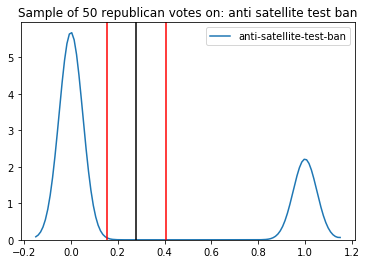

In [23]:
import seaborn as sns

sns.kdeplot(sample, bw = 0.05)
plt.axvline(x=sample.mean(), color = 'k')
plt.axvline(confidence_interval[0], color = 'r')
plt.axvline(confidence_interval[1], color = 'r')
plt.title(f'Sample of {n} republican votes on: anti satellite test ban')
#plt.suptitle('0 is no, 1 is yes')

plt.show()

###Interpret the confidence interval - what does it tell you about the data and its distribution?


Based on *this* sample of 50 republican votes, we can conclude with *(in this case)* 95% certainty that the actual mean value of repulican votes on the issue of "anti satelite test ban" is contained in this interval.

It might be interesting to treat republican/democratic votes as the sample data and poll republican/democratic citizens on the issue to see how well they are being represented

##Chi-squared tests:


###Import and Clean Data

In [0]:
headings = ['mpg',
            'cylinders',
            'displacement',
            'horsepower',
            'weight',
            'acceleration',
            'model_year',
            'origin',
            'car_name']
mpg_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', names=headings, delim_whitespace=True, na_values='?')
mpg_df = mpg_df.dropna()
mpg_df.drop(['cylinders',
            'displacement',
            'weight',
            'acceleration',
            'car_name',
            'origin',
            'mpg'], axis=1, inplace=True)

###Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

*   By hand using Numpy
*   In a single line using Scipy



In [25]:
#decide bin sizes
print('Observed horsepower ranges from ', mpg_df['horsepower'].min(), ' to ', mpg_df['horsepower'].max())


Observed horsepower ranges from  46.0  to  230.0


In [26]:
#create bined features (categoricals)
cut_points = [0, 49, 99, 149, 199, 9000]
label_names = ['0-49','50-99','100-149','150-199','200+']
mpg_df['horsepower_category'] = pd.cut(mpg_df['horsepower'], cut_points, labels=label_names)
mpg_df.horsepower_category.value_counts()


50-99      219
100-149    100
150-199     56
200+        11
0-49         6
Name: horsepower_category, dtype: int64

In [27]:
mpg_df.head()

,horsepower,model_year,horsepower_category
0,130.0,70,100-149
1,165.0,70,150-199
2,150.0,70,150-199
3,150.0,70,150-199
4,140.0,70,100-149


In [28]:
#Hand numpy calculations

cross_tab = pd.crosstab(mpg_df['model_year'], mpg_df['horsepower_category'], margins=True)
cross_tab


horsepower_category,0-49,50-99,100-149,150-199,200+,All
model_year,,,,,,
70,1,9,3,9,7,29
71,0,14,6,7,0,27
72,0,14,3,10,1,28
73,2,10,11,14,3,40
74,0,16,7,3,0,26
75,0,17,11,2,0,30
76,0,18,11,5,0,34
77,0,15,10,3,0,28
78,1,18,16,1,0,36


In [29]:
row_sums = cross_tab.iloc[0:13, 5].values
col_sums = cross_tab.iloc[13, 0:5].values

print(row_sums)
print(col_sums)

total = cross_tab.loc['All','All']
total




#chi_square = ((observed - expected)**2/(expected)).sum()




[29 27 28 40 26 30 34 28 36 29 27 28 30]
[ 11  56   6 219 100]


392

In [30]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
expected.shape

(13, 5)

In [31]:
observed = pd.crosstab(mpg_df['model_year'], mpg_df['horsepower_category']).values
observed.shape

(13, 5)

In [32]:
chi_square_hand = ((observed - expected)**2/(expected)).sum()
chi_square_hand

2633.733767826806

In [35]:
#Scipy one line
chi_square_scipy, p, dof, expected = stats.chi2_contingency(observed)
print(chi_square_scipy, p, dof, expected)

166.08515381955743 6.378059380092692e-15 48 [[ 0.44387755 16.20153061  7.39795918  4.14285714  0.81377551]
 [ 0.41326531 15.08418367  6.8877551   3.85714286  0.75765306]
 [ 0.42857143 15.64285714  7.14285714  4.          0.78571429]
 [ 0.6122449  22.34693878 10.20408163  5.71428571  1.12244898]
 [ 0.39795918 14.5255102   6.63265306  3.71428571  0.72959184]
 [ 0.45918367 16.76020408  7.65306122  4.28571429  0.84183673]
 [ 0.52040816 18.99489796  8.67346939  4.85714286  0.95408163]
 [ 0.42857143 15.64285714  7.14285714  4.          0.78571429]
 [ 0.55102041 20.1122449   9.18367347  5.14285714  1.01020408]
 [ 0.44387755 16.20153061  7.39795918  4.14285714  0.81377551]
 [ 0.41326531 15.08418367  6.8877551   3.85714286  0.75765306]
 [ 0.42857143 15.64285714  7.14285714  4.          0.78571429]
 [ 0.45918367 16.76020408  7.65306122  4.28571429  0.84183673]]


In [36]:
assert(chi_square_hand == chi_square_scipy)
#investigation required!

AssertionError: ignored

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)